In [1]:
import tensorflow as tf
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from tabulate import tabulate
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center; margin-bottom:-30px">Methodology for handling missing values</h1>
<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center">(on the example of Minimum wages)</h2>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px; padding-bottom:20px;margin-bottom:-10px">
Handling missing data is an important step of any data analysis. In real life, the study of given processes and phenomena inevitably encounters missing data, which should be subject to peprocessing analysis. To reveal the nature of the missing data in general, whether they are completely random, random or non-random. To think about what could be done with them so as not to distort the database drastically, but on the contrary to improve their suitability for objective analysis. This report provides an overview of possible tools for dealing with missing data. The emphasis is not on their research, which as a methodology was done in a previous report, but on working with them. Different methods of visualization, imputation and removal are shown in order to enrich the theory and practice of data refinement as a pre-processing step in the field of economic data and others. 
<p style="color:black; background-color:white; padding:5px;padding-bottom:20px;margin-bottom:-10px">The minimum wage in the EU and countries close to the EU is used as an example database. Since the minimum wage is formed either on the basis of collective labor contracts, state decisions or on the basis of the change in basic parameters such as the average wage, etc. , its use is for purely educational purposes.</p>
<p style="color:black; background-color:white; padding:5px;">In this paper, we will focus on the imputation of missing data and the applicability of the algorithms in the minimum wage example. The basic logarithms of Univariate and Multivariate Imputation will be used. Their behavior will be evaluated and visualized.</p>

<h2 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The content of the empirical part of the report includes the following logical steps:</ul>
<li style="color:black; background-color:white; padding:5px">Import the database</li>
<li style="color:black; background-color:white; padding:5px">Check the missing values</li>
<li style="color:black; background-color:white; padding:5px">Dealing with missing values</li>
<li style="color:black; background-color:white; padding:5px">Visualization of imputation algorithms</li>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px"><b>Types of Missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are four types of missing data:</ul>
<li style="color:black; background-color:white; padding:5px">Missing completely at random (MCAR): The fact that it is missing is independent of the remaining variables.</li>
<li style="color:black; background-color:white; padding:5px">Missing at random (MAR):  The missing value can roughly be interpolated from the remaining values to a reasonable degree of accuracy.</li>
<li style="color:black; background-color:white; padding:5px">Missing not at random (MNAR): The reason why the data is missing is related to the remaining variables</li>
<li style="color:black; background-color:white; padding:5px">Structurally Missing Data: The missing data is missing for а reason.</li>

<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Methods for handling missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are three methods at general:</ul>
<li style="color:black; background-color:white; padding:5px">Remove the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Imputatе missing data;</li>
<li style="color:black; background-color:white; padding:5px">Keep the missing values;</li>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">More information on Eurostat's minimum wage methodology please visit: https://ec.europa.eu/eurostat/cache/metadata/en/earn_minw_esms.htm </p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Statistical concepts and definitions</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics refer to national minimum wages. The basic national minimum wage is fixed at an hourly, weekly or monthly rate, and this minimum wage is enforced by law (the government), often after consultation with the social partners, or directly by national intersectoral agreement. The national minimum wage usually applies to all employees, or at least to a large majority of employees in the country. Gross wages are reported.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference area</b></p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">Minimum wage statistics cover EU Member States and the candidate countries with a national minimum wage. The national minimum wage is in 21 of the EU Member States: Belgium, Bulgaria, Czechia, Germany (from 1 January 2015), Estonia, Ireland, Greece, Spain, France, Croatia, Latvia, Lithuania, Luxembourg, Hungary, Malta, the Netherlands, Poland, Portugal, Romania, Slovenia and Slovakia.  In all these countries, except Belgium, the national minimum wage is enforced by the government, often after consultation with the social partners. In Belgium, the national minimum wage is set by national intersectoral agreement and acquires legal force by royal decree. The following candidate countries have a national minimum wage: Albania, North Macedonia, Montenegro, Serbia and Turkey. Data cover also the USA having a national minimum wage. Country-specific information is available in annex.</p>

<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">There is no national minimum wage in 6 EU Member States and the EFTA countries (data is flagged (z)):Cyprus: minimum wages are set by the government for some specific occupations. Denmark, Italy, Austria, Finland and Sweden as well as Iceland, Norway and Switzerland: minimum wages are set by sectoral collective agreements. </p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px">No EU aggregates are calculated due to the nature of the data: not all countries have a national minimum wage and the meaningfulness of a minimum wage at EU level (e.g. calculated as the mean of national minimum wages) is questionable.</p>
<p style="color:black; background-color:white; padding:5px;margin-bottom:-10px"><b>Reference Period</b>: Monthly minimum wages: 1 January (S1) and 1 July (S2)</p>
<p style="color:black; background-color:white; padding:5px;">More about the algorithms used in my current report visit: https://scikit-learn.org/stable/modules/impute.html#impute</p>

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:white; padding:5px;">
As a first step, the database is loaded and functions are executed to reveal the main parameters of the data.</p>

In [2]:
def import_data (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [3]:
import_data(df_minimum_wage = "earn_mw_cur")

,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
0,EUR,AL,268.61,248.43,244.56,242.52,209.10,213.45,211.99,210.66,...,74.40,67.06,67.75,62.78,60.13,52.80,52.36,46.98,45.12,NaN
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1842.28,1658.23,1625.72,1625.72,1625.72,1593.81,1593.81,1593.81,...,1186.31,1163.02,1163.02,1140.24,1140.24,1117.88,1095.89,1095.89,1095.89,1074.44
3,EUR,BG,363.02,332.34,332.34,332.34,311.89,311.89,286.33,286.33,...,56.52,56.28,51.24,51.38,43.65,40.42,38.35,34.26,34.26,31.19
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,PPS,SI,1217.79,1217.79,1160.91,1160.91,1072.77,1072.77,1019.61,1019.61,...,566.74,566.74,534.56,534.56,498.73,498.73,484.59,467.30,449.31,449.31
107,PPS,SK,719.80,719.80,694.18,694.18,645.24,645.24,599.52,599.52,...,261.31,261.31,248.05,248.05,225.39,225.39,202.59,202.59,191.81,159.84
108,PPS,TR,NaN,NaN,NaN,NaN,824.57,824.57,846.59,846.59,...,307.40,307.40,321.06,284.10,303.65,253.10,306.51,283.29,360.90,301.06
109,PPS,UK,NaN,NaN,NaN,NaN,1348.67,1269.79,1284.84,1228.01,...,770.21,770.21,743.46,743.46,681.56,681.56,645.38,645.38,624.35,NaN


In [4]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [5]:
uniques(df_minimum_wage)

Names of columns (features): 
Index(['currency', 'geo\time', '2022S2', '2022S1', '2021S2', '2021S1',
       '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2',
       '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1',
       '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2',
       '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1',
       '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2',
       '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1',
       '1999S2', '1999S1'],
      dtype='object')

Elements of columns (observations): "currency": 
 ['EUR' 'NAC' 'PPS']
Number of elements of columns (observations): "currency": 
 3

Elements of columns (observations): "geo\time": 
 ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'US']
Number of elem

In [6]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("-------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------------------------------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")
    print("--------------------------------------------------------------------------------")

    return df.applymap(type).apply(pd.value_counts).fillna(0)

In [7]:
db_info(df_minimum_wage)

1. Оbservations and features: 
 111 Оbservations and 50 features
-------------------------------
2. Number of cases in the table: 5550
--------------------------------
3. The sum of element types by type is as follows: 
 object      2
float64    48
dtype: int64
--------------------------------
4. Group the features by data type:
 object = ['currency', 'geo\\time'] 

 float64 = ['2022S2', '2022S1', '2021S2', '2021S1', '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2', '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1', '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2', '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1', '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2', '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1', '1999S2', '1999S1']
--------------------------------------------------------------------------------


,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
<class 'str'>,111.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0


<p style="color:black; background-color:white; padding:5px;">After we have loaded the data we see that we have two main columns with string format object type. One column marks the unit of measurement and has 3 unique values, and the other the countries and has 37 unique values. In total, there are 111 rows and 50 columns of data. The remaining columns are in numerical format and mark the minimum wage in the period 1999 - 2022.</p>

<p style="color:black; background-color:white; padding:5px;">We will make two changes: we will change the direction of the time period and leave only the data related to the unit of measurement: purchasing power parity.</p>

In [8]:
df_minimum_wage = df_minimum_wage[list(df_minimum_wage.columns[:2]) + list(df_minimum_wage.columns[:1:-1])]
df_minimum_wage.head()

,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
0,EUR,AL,NaN,45.12,46.98,52.36,52.80,60.13,62.78,67.75,...,180.52,190.58,210.66,211.99,213.45,209.10,242.52,244.56,248.43,268.61
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1074.44,1095.89,1095.89,1095.89,1117.88,1140.24,1140.24,1163.02,...,1562.59,1562.59,1593.81,1593.81,1593.81,1625.72,1625.72,1625.72,1658.23,1842.28
3,EUR,BG,31.19,34.26,34.26,38.35,40.42,43.65,51.38,51.24,...,260.76,260.76,286.33,286.33,311.89,311.89,332.34,332.34,332.34,363.02
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_minimum_wage_pps = df_minimum_wage[df_minimum_wage["currency"] == 'PPS']
df_minimum_wage_pps = df_minimum_wage_pps.drop("currency", axis=1)
df_minimum_wage_pps.head()

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,402.45,429.28
75,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,1053.30,1074.34,1061.50,...,1362.77,1362.77,1387.68,1387.68,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,BG,83.00,91.17,89.38,100.05,100.06,107.66,126.34,126.34,140.47,...,502.79,502.79,535.52,535.52,559.40,559.40,597.76,597.76,597.76,652.93
78,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2. Check the missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
The purpose of this report is not to analyze missing data and search for patterns. However, there is no way to take steps to handle the missing data without revealing its size and type. This is exactly what is done below, outlining them as a size in absolute and relative value and also outlining their type through a structural matrix.</p>

In [10]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,12))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.18)
    plt.show()

Missing values


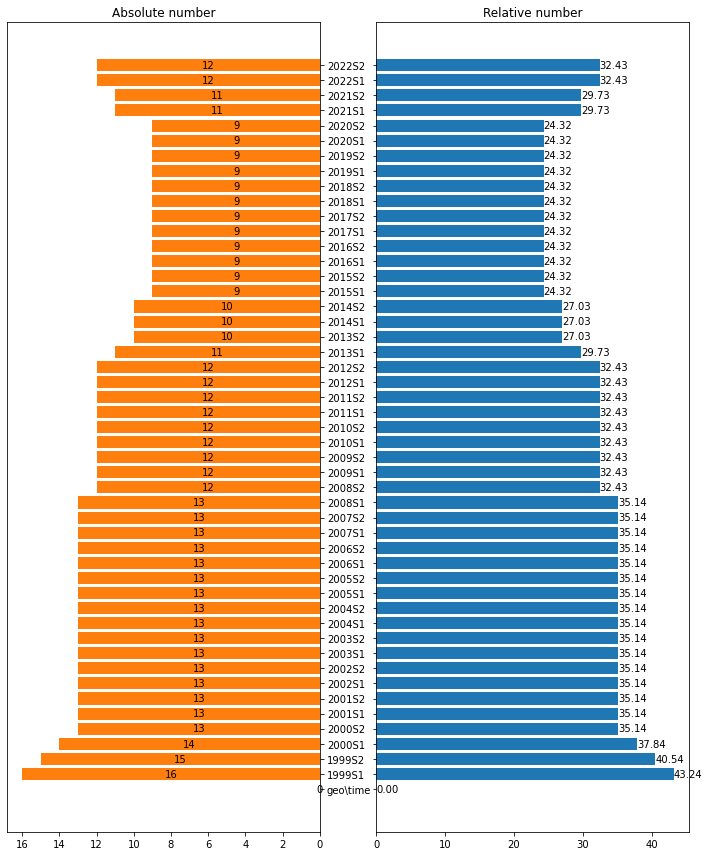

In [11]:
missing_values_features(df_minimum_wage_pps)

<p style="color:black; background-color:white; padding:5px;">As we can see from the missing values plot above, all columns show roughly the same amount of values. They range from 24.32% to 43.24% without the presence of random variations and amplitudes.</p>

<p style="color:black; background-color:white; padding:5px;">Let's look at the missing values in a graphical matrix to see if there are any patterns in the missing values.</p>

<AxesSubplot:>

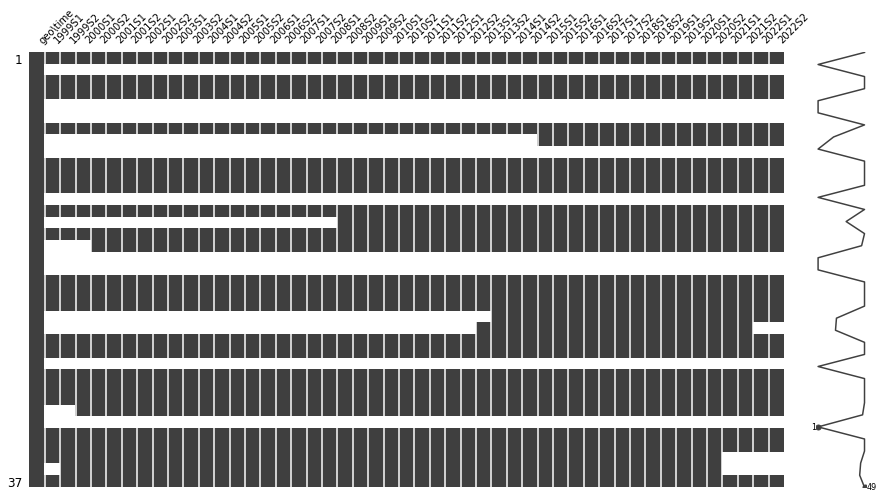

In [12]:
msno.matrix(df_minimum_wage_pps, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The matrix shows us that the missing values are not random. On the contrary, certain countries have missing values in certain time periods with a distinct start and end of the period.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">3. Dealing with missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
The two main approaches to dealing with missing data is to remove or replace it. In this point, we will try to replace them using different methods and find the most accurate one. For this to happen three steps will be taken. First, a part of the database with no missing values will be find and extract. Second, part of the data will be hidden in the form of missing data. Third, different imputation models will be run and the values they suggest will be compared to the actual values.</p>

<p style="color:black; background-color:white; padding:5px;">Using the function, we will output all rows with missing values, then remove them from the database and create a new one to be tested.</p>

In [13]:
def missing_part (df, percent):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    number = len_results*(percent/100)
    global len_results_notnull

    len_results_notnull = df.loc[df.isnull().sum(1)>=number]
    
    observations_part, features_part = len_results_notnull.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows have at least {number:.2f} percent missing values")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_notnull)

In [14]:
missing_part(df_minimum_wage_pps, 1)

The database has 48 columns(features) with float type datas
The folowing 17 rows have at least 0.48 percent missing values
The part of dataframe with filtered missing values is 45.95 % of the whole database


,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
75,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1423.70,1423.70,1458.09,1458.09,1444.53,1444.53,1467.86,1483.61,1516.95,1615.11
82,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,656.55,656.55,708.62,708.62,761.19,761.19,793.69,793.69,875.40,875.40
90,IE,NaN,NaN,NaN,796.41,773.47,826.05,791.12,791.12,841.42,...,1203.24,1203.24,1220.06,1220.06,1183.50,1219.73,1230.31,1230.31,1266.50,1266.50
91,IS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_minimum_wage_pps_no_missing = df_minimum_wage_pps.copy()
df_minimum_wage_pps_no_missing.drop(len_results_notnull.index, inplace=True)

<AxesSubplot:>

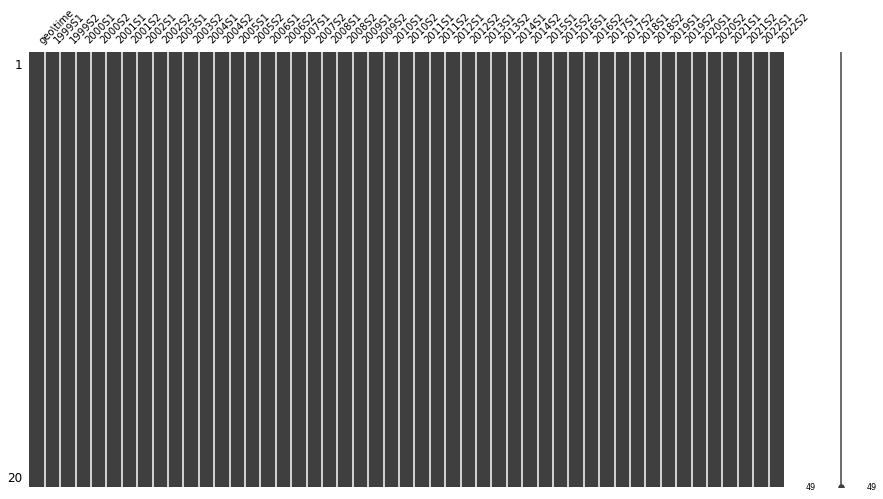

In [16]:
msno.matrix(df_minimum_wage_pps_no_missing, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The matrix shows that all missing values have been removed. We have a part of the database that has no missing values and can be used to test and evaluate missing value prediction methods. Since many of the methods will work with the columns, we will also prepare a transposed version of the database.</p>

In [17]:
df_minimum_wage_pps_no_missing_T = df_minimum_wage_pps_no_missing.copy()

In [18]:
df_minimum_wage_pps_no_missing_T.set_index("geo\\time", inplace=True)
df_minimum_wage_pps_no_missing_T = df_minimum_wage_pps_no_missing_T.T

In [19]:
df_minimum_wage_pps_no_missing_T.rename_axis(None, axis=1, inplace=True)
df_minimum_wage_pps_no_missing_T.head()

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,83.00,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,159.84,760.92
1999S2,93.11,969.51,91.17,199.86,133.15,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,760.92
2000S1,94.29,1004.55,89.38,219.82,148.94,603.62,546.54,951.06,188.74,210.45,1068.78,146.11,642.03,1040.52,280.45,449.84,52.04,467.30,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,210.45,1095.47,146.11,642.03,1058.43,293.01,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21


<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Next step</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Тhe two databases - the transposed and original versions will be run through an algorithmic method evaluation function. This function does the following:</ul>
<li style="color:black; background-color:white; padding:5px">by a specified percentage it "removes" the same percentage of values;</li>
<li style="color:black; background-color:white; padding:5px">runs the algorithms for a specified number of iterations;</li>
<li style="color:black; background-color:white; padding:5px">based on the average of the original database compares the newly obtained average after the algorithms are finished;</li>
<li style="color:black; background-color:white; padding:5px">indicates that algorithm which, after its intervention, the database has closest to the original mean;</li>

In [20]:
def imputation (df, missing, iterations):
    flg1={}
    flg2={}
    for i in range(1,iterations):
        temp1={}
        temp={}

        df1 = df.copy()
        for col in df1.columns:
            df1.loc[df1.sample(frac=missing).index, col] = np.nan
        df_fillna = df1.copy()
        df_fillna.fillna(method='ffill',inplace=True)

        df_bfill = df1.copy()
        df_bfill.fillna(method='bfill',inplace=True)

        df_knn = df1.copy()
        knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
        df_knn1 = knn_imputer.fit_transform(df_knn)
        df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)

        df_imp = df1.copy()
        mice_imputer = IterativeImputer()
        df_imp1 = mice_imputer.fit_transform(df_imp)
        df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
           
        df_linear = df1.copy()
        df_linear.interpolate(limit_direction="both",inplace=True)

        A1 = df.reset_index(drop=True) / (df_fillna.reset_index(drop=True))
        A2 = df.reset_index(drop=True) / (df_bfill.reset_index(drop=True))
        A3 = df.reset_index(drop=True) / (df_knn2.reset_index(drop=True))
        A4 = df.reset_index(drop=True) / (df_imp2.reset_index(drop=True))
        A5 = df.reset_index(drop=True) / (df_linear.reset_index(drop=True))


        temp.update({"ffill": A1.mean().mean()})
        temp.update({"bfill": A2.mean().mean()})
        temp.update({"KNNImputer": A3.mean().mean()})
        temp.update({"IterativeImputer": A4.mean().mean()})
        temp.update({"Linear-interpolate": A5.mean().mean()})

        res_key, res_val = min(temp.items(), key=lambda x: abs(1 - x[1]))
        temp1.update({res_key:res_val})

        flg1[i]=temp
        flg2[i]=temp1

    print("---------------------------------------------")
    print("Dictionary of the most accurate deviations from the used models for Imputations for each iteration:")
    print(flg2)
    print("---------------------------------------------")
    genres = [genre for v in flg2.values() for genre in v.keys()]
    occurs = {g: genres.count(g) for g in set(genres)}
    print("Dictionary with the number of most accurate deviations from the models used for Imputations from all iterations:")
    print(occurs)

In [21]:
imputation(df_minimum_wage_pps_no_missing.iloc[:, 1:], 0.1, 10)

---------------------------------------------
Dictionary of the most accurate deviations from the used models for Imputations for each iteration:
{1: {'IterativeImputer': 0.9997247231102667}, 2: {'IterativeImputer': 1.0006868936271542}, 3: {'IterativeImputer': 1.0005721204852995}, 4: {'IterativeImputer': 1.0007409710901}, 5: {'KNNImputer': 0.9992263512333595}, 6: {'KNNImputer': 1.0011393222395473}, 7: {'IterativeImputer': 1.000372419345281}, 8: {'IterativeImputer': 0.9997859373394286}, 9: {'IterativeImputer': 1.0003190135205269}}
---------------------------------------------
Dictionary with the number of most accurate deviations from the models used for Imputations from all iterations:
{'KNNImputer': 2, 'IterativeImputer': 7}


In [22]:
imputation(df_minimum_wage_pps_no_missing_T, 0.1, 10)

---------------------------------------------
Dictionary of the most accurate deviations from the used models for Imputations for each iteration:
{1: {'IterativeImputer': 1.0000799040687893}, 2: {'Linear-interpolate': 0.9999495660817326}, 3: {'KNNImputer': 1.0000148226501677}, 4: {'KNNImputer': 1.0001488006438177}, 5: {'Linear-interpolate': 0.999903465775873}, 6: {'Linear-interpolate': 0.9999150919174525}, 7: {'Linear-interpolate': 1.0002670020003464}, 8: {'Linear-interpolate': 0.9998884012836818}, 9: {'Linear-interpolate': 0.9999961499858954}}
---------------------------------------------
Dictionary with the number of most accurate deviations from the models used for Imputations from all iterations:
{'KNNImputer': 2, 'IterativeImputer': 1, 'Linear-interpolate': 6}


<p style="color:black; background-color:white; padding:5px;">The data shows that using the database in its original form the most accurate is IterativeImputer, while using the transposed variant this changes in favor of Linear-interpolate. Let's take a visual look at what happens through the following function which will visualize the action of the algorithms on one of the countries like Bulgaria.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">4. Visualization of imputation algorithms</h3>
<p style="color:black; background-color:white; padding:5px;">
After evaluating the accuracy of the algorithms, on the one hand we will see how they do by means of visualization. We will use both random and non-random data removal to compare the performance of the algorithms on both the original database and the transposed version.</p>

<p style="color:black; background-color:white; padding:5px;">
First let's "hide" 20 percent of the database values as missing values at random.</p>

In [23]:
mask = np.random.choice([True, False], size=df_minimum_wage_pps_no_missing.shape, p=[0.2, 0.8])
mask[mask.all(),-1] = 0
df_minimum_wage_pps_missing_20= df_minimum_wage_pps_no_missing.mask(mask)
df_minimum_wage_pps_missing_20.head()

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,NaN,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,NaN,402.45,429.28
76,BE,950.54,969.51,1004.55,1004.55,NaN,1041.35,1053.30,1074.34,1061.50,...,1362.77,1362.77,1387.68,1387.68,NaN,1427.22,1432.92,1432.92,1461.58,1623.80
77,NaN,83.00,91.17,89.38,100.05,NaN,107.66,NaN,126.34,140.47,...,NaN,NaN,NaN,535.52,559.40,559.40,NaN,NaN,597.76,652.93
80,CZ,180.43,199.86,219.82,247.30,278.59,278.59,307.00,307.00,341.30,...,642.85,642.85,NaN,692.29,NaN,729.60,743.72,NaN,792.65,NaN
83,EE,133.15,NaN,148.94,148.94,161.91,161.91,188.81,188.81,220.38,...,NaN,602.50,635.89,NaN,685.28,NaN,NaN,NaN,755.21,755.21


In [24]:
def imputation_visual (df, df1 ): 
    df_fillna = df.copy()
    df_fillna.fillna(method='ffill',inplace=True)
    df_fillna.iloc[2,2:].plot(color='brown', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_bfill = df.copy()
    df_bfill.fillna(method='bfill',inplace=True)
    df_bfill.iloc[2,2:].plot(color='orange', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_knn = df.copy()
    df_knn= df_knn.iloc[:, 2:]
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
    df_knn1 = knn_imputer.fit_transform(df_knn)
    df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)
    df_knn2 = pd.concat([df["geo\\time"], df_knn2.iloc[::]], axis=1)
    df_knn2 = df_knn2.round(1)
    df_knn2.iloc[2,1:].plot(color='green', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_imp = df.copy()
    df_imp= df_imp.iloc[:, 2:]
    mice_imputer = IterativeImputer()
    df_imp1 = mice_imputer.fit_transform(df_imp)
    df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
    df_imp2 = pd.concat([df["geo\\time"], df_imp2[::]], axis=1)
    df_imp2 = df_imp2.round(1)
    df_imp2.iloc[2,1:].plot(color='red', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    
    df_linear = df.copy()
    df_linear.interpolate(limit_direction="both",inplace=True)
    df_linear2 = pd.DataFrame(df_linear, index=df_linear.index, columns=df_linear.columns)
    df_linear2 = df_linear2.round(1)
    df_linear2.iloc[2,2:].plot(color='purple', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    df1.iloc[2,2:].plot(title='MaxSpeed', marker='o', color='blue', figsize=(20,8), lw=3, ms=5)
    df.iloc[2,2:].plot(title='MaxSpeed', marker='o', color='black', figsize=(20,8), lw=5, ms=10)
    plt.legend(['ffill', 'bfill', 'KNNImputer', 'IterativeImputer', 'df_linear', 'original data'])

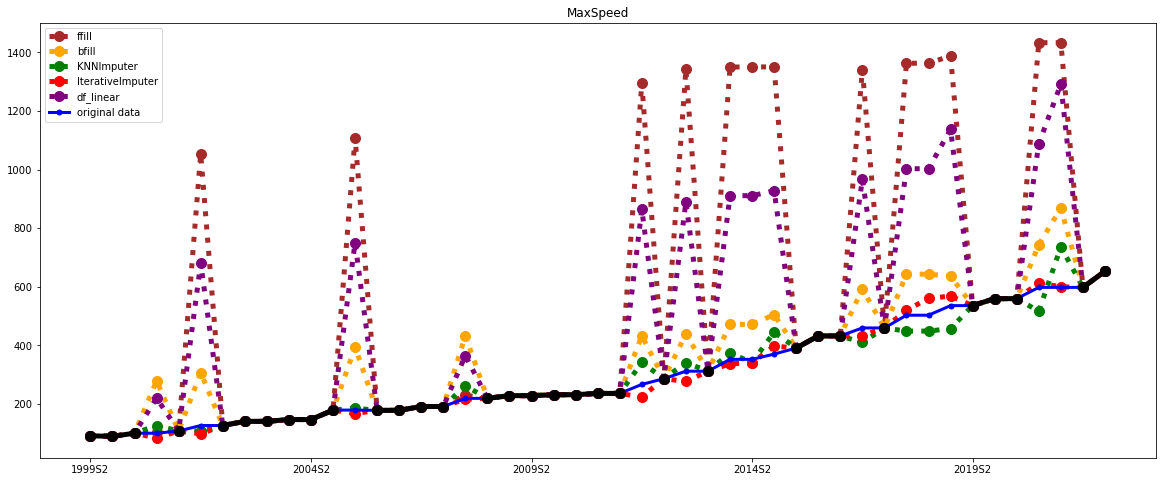

In [25]:
imputation_visual(df_minimum_wage_pps_missing_20, df_minimum_wage_pps_no_missing)

<p style="color:black; background-color:white; padding:5px;">The graph clearly shows why IterativeImputer is most accurate in the original form of the database. Because many of the models handle columns, they take previous and next values that don't make sense because they belong to other countries. In this case, bfill and ffill, instead of using previous and subsequent values of Bulgaria, use values from neighboring countries with much higher minimum wage levels. The same thing happened with the algorithm linear intepolation. However, the two algorithms IterativeImputer and KNNImputer even visually do quite well. Let's now look at what happens with the transposed version of the database.</p>

In [26]:
mask = np.random.choice([True, False], size=df_minimum_wage_pps_no_missing_T.shape, p=[0.2, 0.8])
mask[mask.all(),-1] = 0
df_minimum_wage_pps_missing_T20= df_minimum_wage_pps_no_missing_T.mask(mask)
df_minimum_wage_pps_missing_T20.head()

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,NaN,NaN,NaN,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,NaN,760.92
1999S2,93.11,969.51,NaN,199.86,133.15,590.18,534.96,925.99,NaN,NaN,NaN,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,NaN
2000S1,94.29,1004.55,89.38,219.82,NaN,NaN,NaN,NaN,188.74,210.45,1068.78,146.11,642.03,1040.52,280.45,449.84,52.04,467.30,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,NaN,612.66,546.54,981.69,188.74,210.45,NaN,146.11,642.03,1058.43,293.01,449.84,80.94,NaN,202.59,756.85
2001S1,NaN,NaN,100.06,NaN,161.91,634.63,NaN,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21


In [27]:
def imputation_visual_T (df, df1 ): 
    df_fillna = df.copy()
    df_fillna.fillna(method='ffill',inplace=True)
    df_fillna.iloc[:,2].plot(color='brown', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_bfill = df.copy()
    df_bfill.fillna(method='bfill',inplace=True)
    df_bfill.iloc[:,2].plot(color='orange', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_knn = df.copy()
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
    df_knn1 = knn_imputer.fit_transform(df_knn)
    df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)
    df_knn2 = df_knn2.round(1)
    df_knn2.iloc[:,2].plot(color='green', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_imp = df.copy()
    mice_imputer = IterativeImputer()
    df_imp1 = mice_imputer.fit_transform(df_imp)
    df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
    df_imp2 = df_imp2.round(1)
    df_imp2.iloc[:,2].plot(color='red', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_linear = df.copy()
    df_linear.interpolate(limit_direction="both",inplace=True)
    df_linear2 = pd.DataFrame(df_linear, index=df_linear.index, columns=df_linear.columns)
    df_linear2 = df_linear2.round(1)
    df_linear2.iloc[:,2].plot(color='purple', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    df1.iloc[:,2].plot(title='MaxSpeed', marker='o', color='blue', figsize=(20,8), lw=3, ms=5)

    df.iloc[:,2].plot(title='MaxSpeed', marker='o', color='black', figsize=(20,8), lw=5, ms=10)
    plt.legend(['ffill', 'bfill', 'KNNImputer', 'IterativeImputer', 'df_linear', 'original data'])

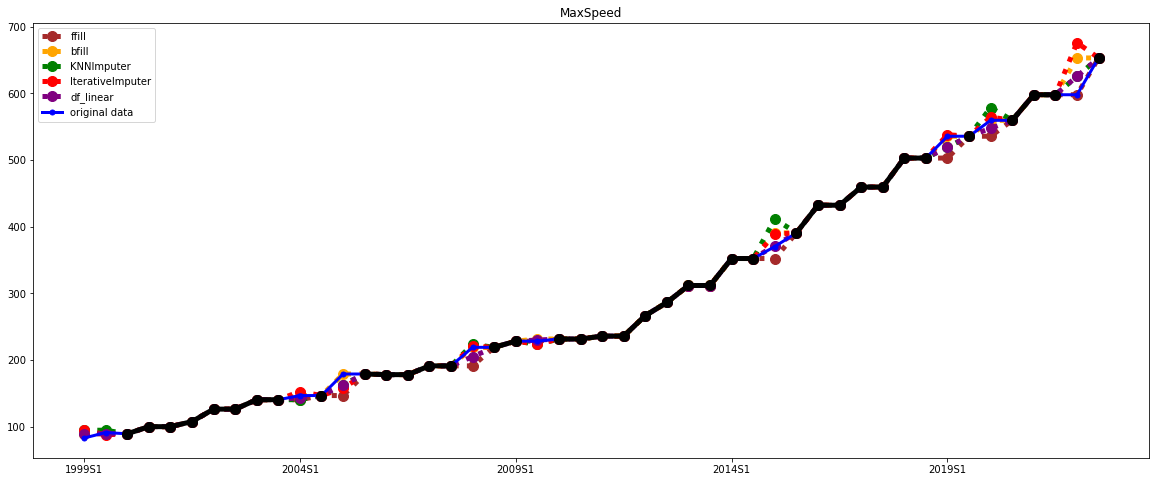

In [28]:
imputation_visual_T(df_minimum_wage_pps_missing_T20, df_minimum_wage_pps_no_missing_T)

<p style="color:black; background-color:white; padding:5px;">In this case, the problems with some of the algorithms no longer occur. All manage to some extent to provide logical real predictive value. It is difficult to compare the algorithms for the two versions of the database - the original and the transposed one, because the missed values in the form of missing are random. Let's avoid this and remove some of the values non-randomly. For example, from the 2nd row, every 5th, as well as every fifth column starting with the second.</p>

In [29]:
df_minimum_wage_pps_missing_deliberate = df_minimum_wage_pps_no_missing.copy()
df_minimum_wage_pps_missing_deliberate.iloc[2::5, 2::5] = np.nan
df_minimum_wage_pps_missing_deliberate.head()

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,402.45,429.28
76,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,1053.30,1074.34,1061.50,...,1362.77,1362.77,1387.68,1387.68,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,BG,83.00,NaN,89.38,100.05,100.06,107.66,NaN,126.34,140.47,...,502.79,502.79,535.52,NaN,559.40,559.40,597.76,597.76,NaN,652.93
80,CZ,180.43,199.86,219.82,247.30,278.59,278.59,307.00,307.00,341.30,...,642.85,642.85,692.29,692.29,729.60,729.60,743.72,743.72,792.65,792.65
83,EE,133.15,133.15,148.94,148.94,161.91,161.91,188.81,188.81,220.38,...,602.50,602.50,635.89,635.89,685.28,685.28,674.38,674.38,755.21,755.21


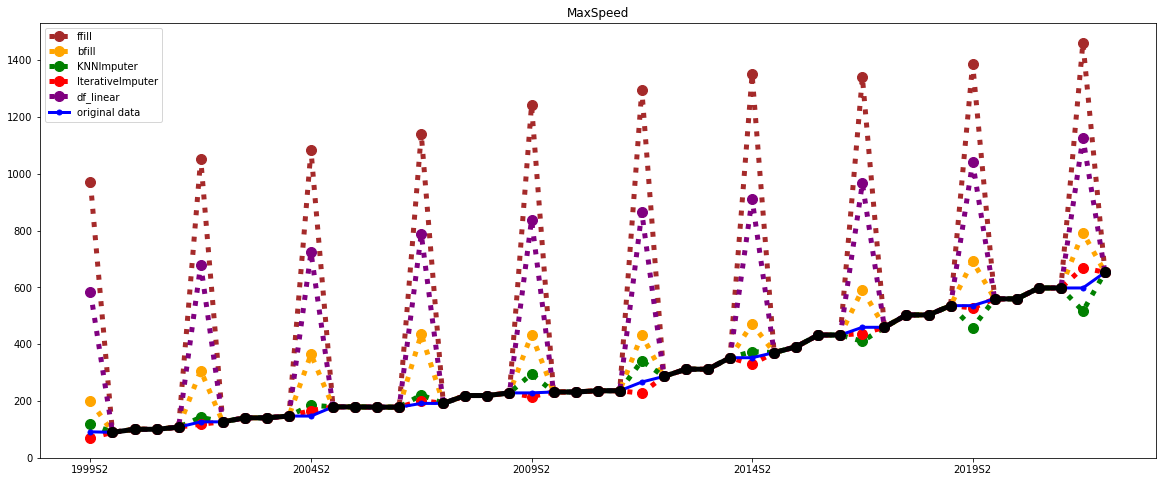

In [30]:
imputation_visual(df_minimum_wage_pps_missing_deliberate, df_minimum_wage_pps_no_missing)

In [31]:
df_minimum_wage_pps_missing_T_deliberate = df_minimum_wage_pps_no_missing_T.copy()
df_minimum_wage_pps_missing_T_deliberate.iloc[2::5, 2::5] = np.nan
df_minimum_wage_pps_missing_T_deliberate.head()

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,83.00,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,159.84,760.92
1999S2,93.11,969.51,91.17,199.86,133.15,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,760.92
2000S1,94.29,1004.55,NaN,219.82,148.94,603.62,546.54,NaN,188.74,210.45,1068.78,146.11,NaN,1040.52,280.45,449.84,52.04,NaN,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,210.45,1095.47,146.11,642.03,1058.43,293.01,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21


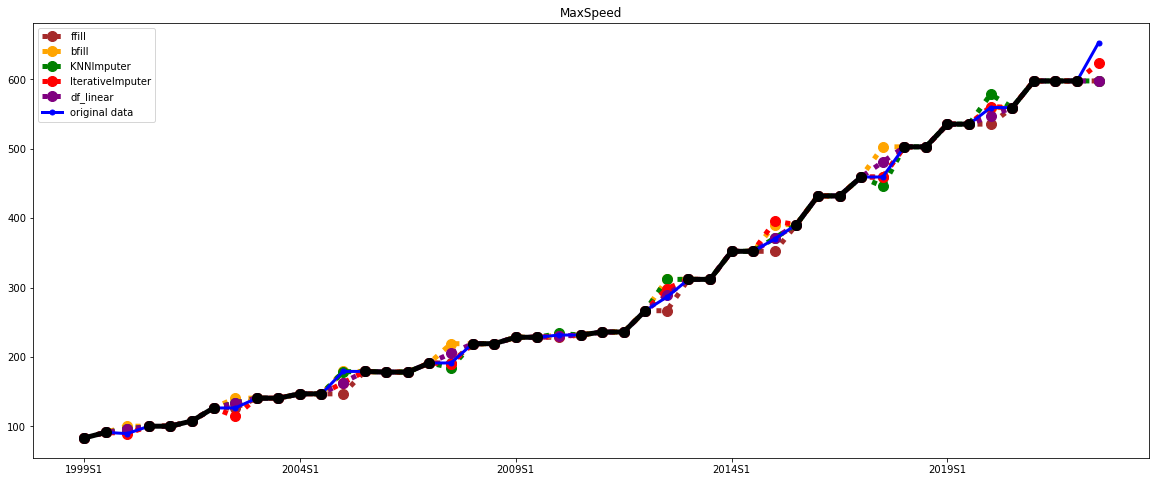

In [32]:
imputation_visual_T(df_minimum_wage_pps_missing_T_deliberate, df_minimum_wage_pps_no_missing_T)

<p style="color:black; background-color:white; padding:5px;">Using non-random removal of values we can compare to what extent the correctly used database ie. in the form suitable for analysis is relevant for missing values analysis. The above graph shows the wrong previous and next value information because the columns are not related to the time series of countries. While the bottom graph clearly shows that the transposed graph gives adequate results because the column now follows the time order of each country. However, it is difficult on this type of timeline to see the performance of any single algorithm. Therefore, we will zoom in within a few years to see the behavior of more complex algorithms in detail.</p>

In [33]:
def imputation_visual_T_part (df, df1 ): 
    df_knn = df.copy()
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
    df_knn1 = knn_imputer.fit_transform(df_knn)
    df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)
    df_knn2 = df_knn2.round(1)
    df_knn2.iloc[:,2].plot(color='green', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_imp = df.copy()
    mice_imputer = IterativeImputer()
    df_imp1 = mice_imputer.fit_transform(df_imp)
    df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
    df_imp2 = df_imp2.round(1)
    df_imp2.iloc[:,2].plot(color='red', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_linear = df.copy()
    df_linear.interpolate(limit_direction="both",inplace=True)
    df_linear2 = pd.DataFrame(df_linear, index=df_linear.index, columns=df_linear.columns)
    df_linear2 = df_linear2.round(1)
    df_linear2.iloc[:,2].plot(color='purple', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    df1.iloc[:,2].plot(title='MaxSpeed', marker='o', color='blue', figsize=(20,8), lw=3, ms=5)

    df.iloc[:,2].plot(title='MaxSpeed', marker='o', color='black', figsize=(20,8), lw=5, ms=10)
    plt.legend(['KNNImputer', 'IterativeImputer', 'df_linear', 'original data'])

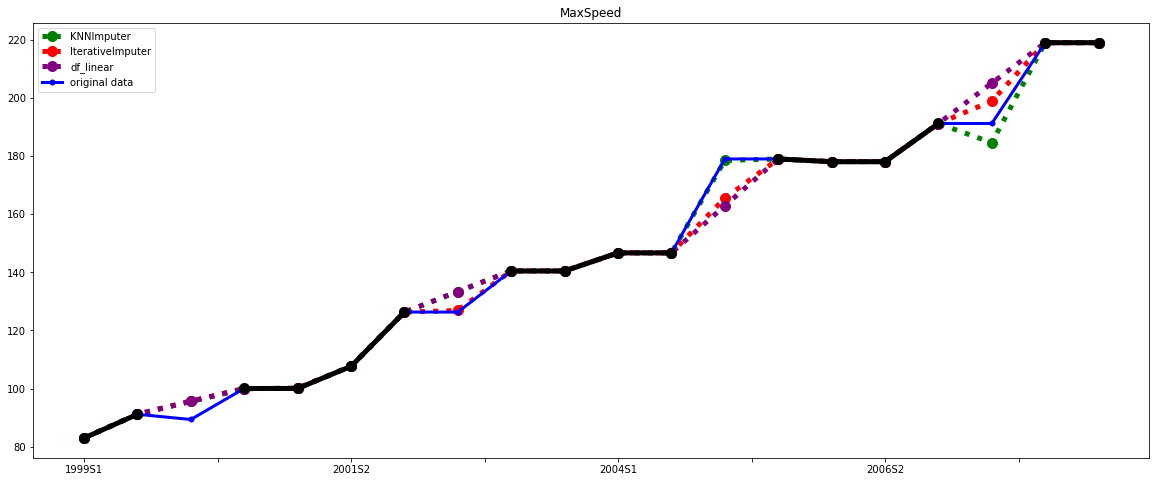

In [34]:
imputation_visual_T_part(df_minimum_wage_pps_missing_T_deliberate.iloc[0:20,:], df_minimum_wage_pps_no_missing_T.iloc[0:20,:])

<p style="color:black; background-color:white; padding:5px;">The results show that IterativeImputer and KNNImputer give close to the real results. This is explained by the fact that in the economy, and not only in it, the time series values of individual indicators rarely change linearly. And for this reason, the two algorithms perform better because more complex calculations are used.</p>

---

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">IV. Conclusion</h2>
<p style="color:black; background-color:white; padding:5px;">The task of this report was to test the applicability of algorithms for dealing with missing data on the example of economic statistics. Using a minimum wage database made it possible to test the accuracy of the algorithms when there are individual cases in time series. Database transformation was applied through transposition, revealing particular weaknesses of individual algorithms. The visualization made it possible to "see" how well the algorithms provide an adequate opportunity for use in the presence of missing data in economic statistics. Overall, the results are good, but no single algorithm has been shown to be absolutely accurate. Rather, the exploration of the data, the transformation of the database, the use and testing of the algorithms make it possible to "recover" the missing data in part of the time series.
</p>